In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Eksploracja danych



## import danych

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df = pd.read_csv(url, names=column_names)

type_names = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed(none in this database)',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

df['TypeName'] = df['Type'].map(lambda x: type_names[x].replace('_', ' ').title())
X = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
Y = df['Type']

## Analiza

In [4]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,TypeName
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,Building Windows Float Processed
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,Building Windows Float Processed
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,Building Windows Float Processed
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,Building Windows Float Processed
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,Building Windows Float Processed
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,Headlamps
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,Headlamps
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,Headlamps
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,Headlamps


In [5]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Taka analiza oczywiście średnio ma sens dla takich danych

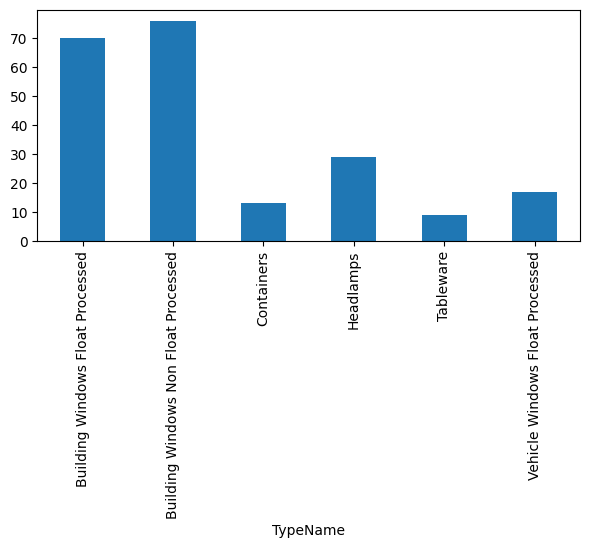

In [6]:
df.groupby('TypeName').size()
df.groupby('TypeName').size().plot(kind='bar', figsize=(7, 3))
plt.show()

Analiza liczności typów szkła w zbiorze danych

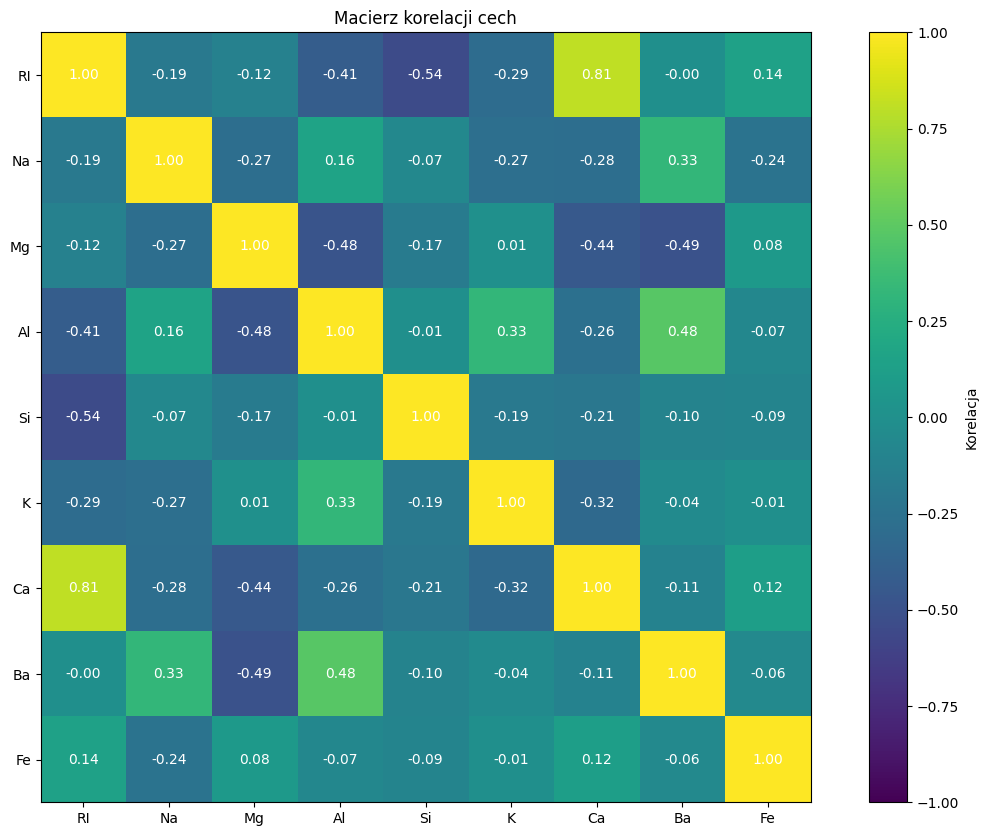

In [7]:
plt.figure(figsize=(15,10))
plt.imshow(X.corr(), vmin=-1, vmax=1)
corr_matrix = X.corr()
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = f"{corr_matrix.iloc[i, j]:.2f}"
        plt.text(i, j, text, ha='center', va='center', color='white')

plt.title('Macierz korelacji cech')
plt.colorbar(label='Korelacja')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()


## Wnioski
Najwięcej danych jest o szkle z budynków
Dużo jest wartości dosyć małych (<10)
Wysoka korelacja atrybutu RI oraz CA


# Przygotowanie danych

## Dane nie przetworzone

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=260407, stratify=Y)

## Dane ustandaryzowane


In [9]:
standard_scaler = StandardScaler()
X_std_train = standard_scaler.fit_transform(X_train)
X_std_test = standard_scaler.transform(X_test)
X_std_train = pd.DataFrame(X_std_train, columns=X_train.columns)
X_std_test = pd.DataFrame(X_std_test, columns=X_test.columns)

## PCA

In [10]:
PCA_COMPONENTS = 9
pca = PCA(n_components=PCA_COMPONENTS)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
X_pca_train = pd.DataFrame(X_pca_train, columns=[f'PC{i}' for i in range(1, 1 + PCA_COMPONENTS)])
X_pca_test = pd.DataFrame( X_pca_test, columns=[f'PC{i}' for i in range(1, 1 + PCA_COMPONENTS)])

## Klasyfikatory


In [11]:
classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('naive_bayes', GaussianNB())
]


In [12]:
def train_and_test_model(X_train, X_test, Y_train, Y_test, model):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

    return f"{accuracy:.3f}", f"{precision:.3f}", f"{recall:.3f}", f"{f1:.3f}"

In [13]:
def run_models_tests(X_train, X_test, process_name):
    print("Przetwarzanie: ", process_name)
    print(f"{'Klas:':<15} {'Acc.:':<15} {'Prec:':<15} {'Rec:':<15} {'F1:':<15}")
    acc_results = []
    prec_results = []
    rec_results = []
    f1_results = []

    for name, model in classifiers:
        accuracy, precision, recall, f1 = train_and_test_model(X_train, X_test, Y_train, Y_test, model)

        print(f"{name:<15} {accuracy:<15} {precision:<15} {recall:<15} {f1:<15}")
        acc_results.append(accuracy)
        prec_results.append(precision)
        rec_results.append(recall)
        f1_results.append(f1)
    print()

    return acc_results, prec_results, rec_results, f1_results


_, _, _, f1_results_brak = run_models_tests(X_train, X_test, "brak")
_, _, _, f1_results_std = run_models_tests(X_std_train, X_std_test, "std")
_, _, _, f1_results_pca = run_models_tests(X_pca_train, X_pca_test, "pca")

Przetwarzanie:  brak
Klas:           Acc.:           Prec:           Rec:            F1:            
decision_tree   0.741           0.746           0.741           0.733          
naive_bayes     0.463           0.450           0.463           0.434          

Przetwarzanie:  std
Klas:           Acc.:           Prec:           Rec:            F1:            
decision_tree   0.741           0.742           0.741           0.732          
naive_bayes     0.463           0.450           0.463           0.434          

Przetwarzanie:  pca
Klas:           Acc.:           Prec:           Rec:            F1:            
decision_tree   0.704           0.692           0.704           0.686          
naive_bayes     0.500           0.506           0.500           0.483          



C:\Users\kubas\PycharmProjects\Artificial_Intelligence\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Jak widać najlepsze wyniki ma drzewo decyzyjne na nieprzetworzonych danych. Naiwny bayes jest stabilny i ma podobne wyniki metryk nezależnie od przekształceń danych ,  jednak najelpiej radzi sobie na danych przetworzonych metodą PCA. Natomiast przetworzenie danych tą metodą bardzo negatywnie wpływa na metryki klasyfikatora drzewa decyzyjnego

# Hiperparametry

## NAive bayes


In [14]:
prirors = [1/len(Y.unique())] * len(Y.unique())
print(prirors)
def find_best_bayes(processing,X_train,X_test,steps,min_alpha,max_alpha,prirors = None):
    model = GaussianNB()
    smoothing = np.logspace(min_alpha, max_alpha, steps)
    priors_name = "priors default" if prirors is None else "priors equal"
    best_f1 = 0
    best_alpha = 0
    f1_scores = []
    alphas = []

    for val in smoothing:
        model.set_params(var_smoothing=val, priors=prirors)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        f1 = f1_score(Y_test, Y_pred, average="micro")
        f1_scores.append(f1)
        alphas.append(val)
        if f1 > best_f1:
            best_f1 = f1
            best_alpha = val


    print(f"Process: {processing}",
          f'Best F1 Score: {best_f1:.3f}', f'Smoothing: {best_alpha:.10f}', f'Smoothing: {best_alpha:.1e}', priors_name,  sep="\t")
    return f1_scores, alphas


[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


In [15]:
f1_scores_default, alphas_default = find_best_bayes("Brak", X_train, X_test, 500, -5, 0)
f1_scores_equal, alphas_equal = find_best_bayes("Brak", X_train, X_test, 500, -5, 0, prirors)

std_f1_scores_default, std_alphas_default = find_best_bayes("std", X_std_train, X_std_test, 500, -10, 0)
std_f1_scores_equal, std_alphas_equal = find_best_bayes("std", X_std_train, X_std_test, 500, -10, 0, prirors)

pca_f1_scores_default, pca_alphas_default = find_best_bayes("pca", X_pca_train, X_pca_test, 500, -10, 0)
pca_f1_scores_equal, pca_alphas_equal = find_best_bayes("pca", X_pca_train, X_pca_test, 500, -10, 0, prirors)

Process: Brak	Best F1 Score: 0.537	Smoothing: 0.0585511016	Smoothing: 5.9e-02	priors default
Process: Brak	Best F1 Score: 0.407	Smoothing: 0.0000100000	Smoothing: 1.0e-05	priors equal
Process: std	Best F1 Score: 0.537	Smoothing: 0.2876854090	Smoothing: 2.9e-01	priors default
Process: std	Best F1 Score: 0.407	Smoothing: 0.0000000001	Smoothing: 1.0e-10	priors equal
Process: pca	Best F1 Score: 0.519	Smoothing: 0.0000003524	Smoothing: 3.5e-07	priors default
Process: pca	Best F1 Score: 0.574	Smoothing: 0.0000003366	Smoothing: 3.4e-07	priors equal


### wnioski
Modyfikacja parametru smoothing wpłyneła pozytywnie na efektywność klasyfikatora niezaelżnie od parametru priors i sposobu przetwarzania danych
Natomiast zmiana parametru priors wpłyneła negatywnie na klasyfikator przy przetwarzaniu żadnym oraz standaryzacji. Natomiast Przy przetwarzaniu metodą pca wyniki się polepszyły.
Najlepszym połączeniem jest przetwarzanie pca oraz modyfikacja parametrów priors i smoothing. Być może da się znaleźć jeszcze lepsze wartości parametru priors.

## Decision Tree

In [16]:
def find_best_tree(preprocessing, X_train, X_test, max_depth=10, max_leaves=10):
    model = DecisionTreeClassifier()
    depths = range(2, max_depth)
    leaf_nodes = range(2, max_leaves)

    f1_scores = np.array([[0] * len(leaf_nodes)] * len(depths), dtype=float)

    best_f1 = 0
    best_depth = 0
    best_leaf_nodes = 0

    for max_depth in depths:
        for max_leaf_nodes in leaf_nodes:
            model.set_params(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            f1 = f1_score(Y_test, Y_pred, average="weighted")
            f1_scores[max_depth - 2, max_leaf_nodes - 2] = f1
            if f1 > best_f1:
                best_f1 = f1
                best_depth = max_depth
                best_leaf_nodes = max_leaf_nodes


    print(f"Process: {preprocessing}", f'Best F1 Score: {best_f1:.5f}', f'Depth: {best_depth}', f'Leaf nodes: {best_leaf_nodes}',  sep="\t")
    return best_f1, best_depth, best_leaf_nodes, f1_scores

In [17]:
best_f1, depth, leaf_nodes, f1_scores = find_best_tree("brak", X_train, X_test, 20, 20)
std_best_f1, std_depth, std_leaf_nodes, std_f1_scores = find_best_tree("std", X_std_train, X_std_test, 20, 20)
pca_best_f1, pca_depth, pca_leaf_nodes, pca_f1_scores = find_best_tree("pca", X_pca_train, X_pca_test, 20, 20)

Process: brak	Best F1 Score: 0.76821	Depth: 4	Leaf nodes: 7
Process: std	Best F1 Score: 0.76821	Depth: 4	Leaf nodes: 7
Process: pca	Best F1 Score: 0.72058	Depth: 8	Leaf nodes: 16


Wnioski - porównująć do poprzednich wynikó bez modyfikacji hiperparametrów osiągnięto znacznie lepsze wyniki. Przetwarzanie danych metodą standaryzacji lub brak przetwarzania prowadziły do najlpeszych wartości wskażnika f1. Natomiast przetwarzanie metodą pca prowadziło do wyników gorszych, natomiast i tak lepszych niż przy braku modyfikacji hiperparametrów. (0.650 vs 0.720)


# Podsumowanie

Różne klasyfikatory zachowują się różnie poprzez wpływ czynników takich jak metoda przygotowania danych czy modyfikacjia hiperparametrów. Modyfikacja hiperparametrów zazwyczaj wpływała pozytywnie na skuteczność klasyfikatora natomiast wpływ sposobu przygotowania danych zależał od klasyfikatora. W przypadku przetwarzania poprzez standaryzację nie było widać zmian w efektywności względem braku przetwarzania natomiast przetwarzanie pca zazwyczaj dawało gorsze wyniki.W przypadku modyfikacji hiperparametrów trend ten dalej się utrzymuje dla drzewa decyzyjnego, natomiast klasyfikator bayesa miał najlepsze wyniki właśnie przy danych przetworzonych metodą pca.